In [39]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import glob, os

import itertools

from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

from sklearn import linear_model, svm, cross_validation, naive_bayes, ensemble, tree, neighbors, decomposition, preprocessing
from pandas.tseries.offsets import BDay

import pandas as pd
import numpy as np
import scipy
import pprint

%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

exo_list = storage.exo_list()
pp.pprint(exo_list)


df = pd.DataFrame()

for e in exo_list:
    exo_series, exo_dict = storage.load_series(e)
    
    exo_series = exo_series[exo_series.columns[0]]
    df[exo_dict['name']] = exo_series
#exo_series.plot()

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_ContFut',
    'ZS_BullishCollarBW',
    'ZS_BearishCollarBW',
    'ZS_CallSpread',
    'ZS_PutSpread',
    'ZS_ContFut',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'CL_ContFut',
    'ZW_BullishCollarBW',
    'ZW_BearishCollarBW',
    'ZW_CallSpread',
    'ZW_PutSpread',
    'ZW_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'NG_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut',
    'CL_SMART_Ichimoku_Long',
    'ES_SMART_Ichimoku_Long',
    'NG_SMART_Ichimoku_Long',
    'ZC_SMART_Ichimoku_Long',
    'ZS_SMART_Ichimoku_Long',
    'ZW_SMART_Ichimoku_Long',
    'ZN_SMART_Ichimoku_Long',
    'CL_SMART

In [3]:
df.tail()

,ES_BullishCollarBW,ES_BearishCollarBW,ES_CallSpread,ES_PutSpread,ES_ContFut,ZS_BullishCollarBW,ZS_BearishCollarBW,ZS_CallSpread,ZS_PutSpread,ZS_ContFut,...,NG_SmartEXO_Ichi_Put_Spread_150Delta_Bi,ZC_SmartEXO_Ichi_Put_Spread_150Delta_Bi,ZS_SmartEXO_Ichi_Put_Spread_150Delta_Bi,ZW_SmartEXO_Ichi_Put_Spread_150Delta_Bi,CL_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ES_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,NG_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ZC_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ZS_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ZW_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral
2016-10-27,8931.283035,-40969.605459,9368.028293,-12636.539971,48687.5,7514.471841,-6633.463434,9297.399875,-6269.413631,34187.5,...,34388.992607,-12410.407477,-627.734791,-11207.630464,-3553.348501,-8060.747715,-10197.728523,-6408.248121,5069.894782,10299.643129
2016-10-28,8774.597057,-40753.521943,9284.234630,-12566.133704,48325.0,7183.219561,-6369.510403,8902.811646,-6111.517057,33675.0,...,33727.644801,-12449.912251,-943.411999,-11285.699514,-3599.909694,-7796.026052,-11057.380861,-6440.532103,4906.215347,11220.460693
2016-10-31,8787.914644,-40769.498904,9308.729608,-12569.647414,48375.0,7075.620229,-6376.822791,8806.693072,-6161.884901,33625.0,...,33358.561633,-12450.428521,-1178.609227,-11195.354589,-3550.693402,-7904.696864,-11578.931700,-6435.659197,4714.357415,10082.465403
2016-11-01,8470.314815,-40285.588598,9138.860441,-12434.511532,47600.0,6394.851393,-5791.721932,8041.640610,-5795.280209,32662.5,...,35896.939878,-12621.440687,-1404.206427,-11286.136161,-3752.552208,-7409.443361,-9040.553455,-6599.671453,4460.936459,10522.738769
2016-11-02,8262.022944,-40004.679721,9019.312534,-12344.399800,47125.0,6069.954936,-5489.564917,7674.090833,-5613.597467,32225.0,...,38717.508925,-12624.766843,-1448.805959,-11237.056677,-782.641054,-7094.755585,-6219.984409,-6610.895562,4412.371427,9914.137664


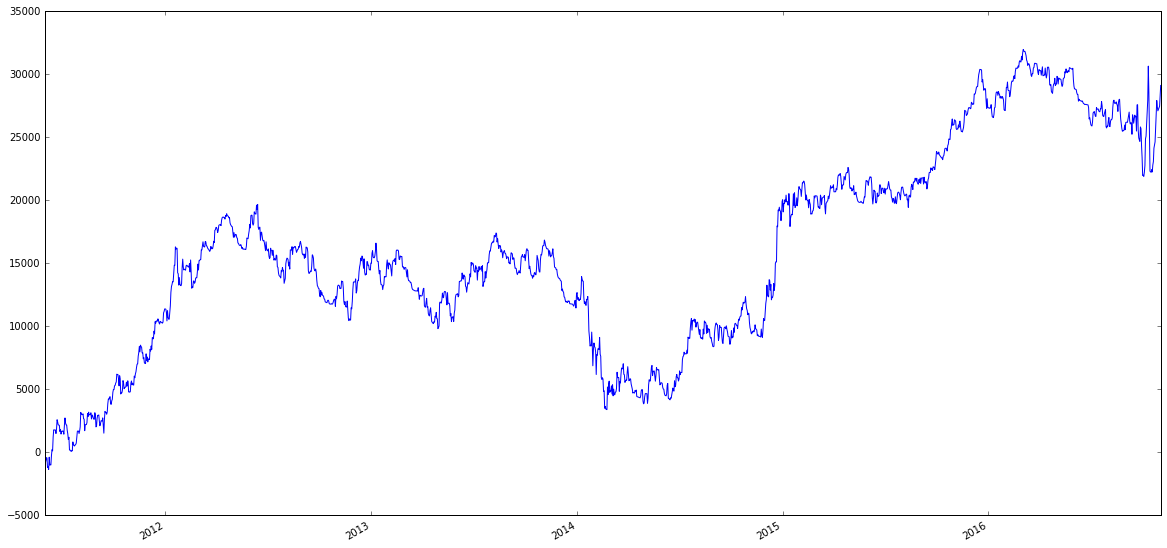

In [443]:
px_ser = df.NG_BearishCollarBW
px_ser.dropna().plot()

# Model

In [482]:
i = 100

empty_ser = pd.Series(False, index=px_ser.dropna().index)

signals_df = pd.DataFrame()

signals_df['long_entry_signal'] = empty_ser
signals_df['long_exit_signal'] = empty_ser

signals_df['short_entry_signal'] = empty_ser
signals_df['short_exit_signal'] = empty_ser

while True:
    dataset_df = pd.DataFrame(index=px_ser.dropna().iloc[:i].index)
    
    px_ser_slice = px_ser[dataset_df.index].rolling(10).median()
    
    dataset_df['target'] = px_ser_slice.shift(-1)
    
    #dataset_df['features_px'] = px_ser_slice
    dataset_df['features_shift1'] = px_ser_slice.shift(1)
    dataset_df['features_shift2'] = px_ser_slice.shift(2)
    #dataset_df['features_shift3'] = px_ser_slice.shift(3)
    #dataset_df['features_shift5'] = px_ser_slice.shift(5)
    #dataset_df['features_shift10'] = px_ser_slice.shift(10)

    dataset_df['features_ma5'] = px_ser_slice.rolling(5).mean()
    #dataset_df['features_ma10'] = px_ser_slice.rolling(10).mean()
    #dataset_df['features_ma20'] = px_ser_slice.rolling(20).mean()
    #dataset_df['features_ma30'] = px_ser_slice.rolling(30).mean()

    dataset_df['features_relstr5'] = px_ser_slice - px_ser_slice.rolling(5).mean()
    #dataset_df['features_relstr10'] = px_ser_slice - px_ser_slice.rolling(10).mean()
    #dataset_df['features_relstr20'] = px_ser_slice - px_ser_slice.rolling(20).mean()
    #dataset_df['features_relstra30'] = px_ser_slice - px_ser_slice.rolling(30).mean()
    
    predict_features = dataset_df.filter(like='features').dropna()
    
    dataset_df.dropna(inplace=True)

    #dataset_df = pd.DataFrame(data=preprocessing.StandardScaler().fit_transform(dataset_df.values), 
    #                          index=dataset_df.index, columns=dataset_df.columns)

    #dataset_df = pd.DataFrame(data=preprocessing.RobustScaler().fit_transform(dataset_df.values), 
    #                          index=dataset_df.index, columns=dataset_df.columns)

    target = dataset_df.target

    features = dataset_df.filter(like='features')
    
    #rf = ensemble.RandomForestRegressor(n_estimators=50).fit(features.iloc[:i], target.iloc[:i])
    #features = features[pd.Series(rf.feature_importances_, index=features.columns).sort_values()[-3:].index]
    
    
    #model = linear_model.LinearRegression()
    #model = linear_model.ElasticNet()
    #model = linear_model.RANSACRegressor()
    
    #knn = neighbors.KNeighborsRegressor(5)
    #lr = linear_model.LinearRegression()
    #model = ensemble.BaggingRegressor(base_estimator=None, n_estimators=50)
    
    #model = linear_model.RANSACRegressor()
    #model = tree.DecisionTreeRegressor(max_depth=4)
    #model = svm.NuSVR()
    #model = ensemble.AdaBoostRegressor(n_estimators=10)
    #model = ensemble.GradientBoostingRegressor()
    #model = ensemble.RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1)
    model = neighbors.KNeighborsRegressor(5, algorithm='auto')
    #model = neighbors.RadiusNeighborsRegressor(5, n_jobs=1, algorithm='auto')
    
    model.fit(features.iloc[:i], target.iloc[:i])
        
    '''if i <= px_ser.size/4:
        model = neighbors.KNeighborsRegressor(5, n_jobs=-1)
        model.fit(features.iloc[:i], target.iloc[:i])
        print('NO FITTING FROM',  px_ser[dataset_df.index].iloc[:i].index[-1])'''
    
    '''if prediction_series.size == 0:    
        prediction_series = pd.Series(model.predict(predict_features.iloc[:i]), index=predict_features.iloc[:i].index, name='Prediction')
    
    else:
        prediction_series = pd.concat([prediction_series,
                                       pd.Series(model.predict(predict_features.iloc[:i])[-1], 
                                                 index=[predict_features.iloc[:i].index[-1] + pd.DateOffset(1)])])'''
    
        
    prediction_series = pd.Series(model.predict(features.iloc[:i]), 
                                  index=features.iloc[:i].index, name='Prediction') 
    
    #if prediction_series[-1] > prediction_series.rolling(5).mean()[-1]:
    if prediction_series[-1] > prediction_series[-2]:
        signals_df['long_entry_signal'].ix[px_ser_slice.index[-1]] = True
        
        
        signals_df['long_exit_signal'].ix[px_ser_slice.index[-1] + BDay(1)] = True
            
           
    #if prediction_series[-1] < prediction_series.rolling(5).mean()[-1]:
    if prediction_series[-1] < prediction_series[-2]:
        signals_df['short_entry_signal'].ix[px_ser_slice.index[-1]] = True
        
        
        signals_df['short_exit_signal'].ix[px_ser_slice.index[-1]+ BDay(1)] = True
            
    print('last date-', prediction_series.iloc[:i].index[-1])
    
    if i >= px_ser.dropna().size:
        break
        
    i += 1
    
#signals_df.loc[(signals_df.long_exit_signal == True) & (signals_df.long_entry_signal == True), 'long_exit_signal'] = False
#signals_df.loc[(signals_df.short_exit_signal == True) & (signals_df.short_entry_signal == True), 'short_exit_signal'] = False

last date- 2011-09-07 00:00:00
last date- 2011-09-08 00:00:00
last date- 2011-09-09 00:00:00
last date- 2011-09-10 00:00:00
last date- 2011-09-11 00:00:00
last date- 2011-09-12 00:00:00
last date- 2011-09-13 00:00:00
last date- 2011-09-14 00:00:00
last date- 2011-09-15 00:00:00
last date- 2011-09-16 00:00:00
last date- 2011-09-17 00:00:00
last date- 2011-09-18 00:00:00
last date- 2011-09-19 00:00:00
last date- 2011-09-20 00:00:00
last date- 2011-09-21 00:00:00
last date- 2011-09-22 00:00:00
last date- 2011-09-23 00:00:00
last date- 2011-09-24 00:00:00
last date- 2011-09-25 00:00:00
last date- 2011-09-26 00:00:00
last date- 2011-09-27 00:00:00
last date- 2011-09-28 00:00:00
last date- 2011-09-29 00:00:00
last date- 2011-09-30 00:00:00
last date- 2011-10-01 00:00:00
last date- 2011-10-02 00:00:00
last date- 2011-10-03 00:00:00
last date- 2011-10-04 00:00:00
last date- 2011-10-05 00:00:00
last date- 2011-10-06 00:00:00
last date- 2011-10-07 00:00:00
last date- 2011-10-08 00:00:00
last dat

# Backtest

{'avg': 101.91876389470802,
 'avgbarsintrade': -0.549738219895288,
 'avgmae': -27.166401319035941,
 'costs_sum': 0.0,
 'count': 382,
 'maxdd': -6349.9385684877343,
 'netprofit': 38932.967807778463,
 'std': 628.9104438010022,
 'tradesmaxdd': -6118.1791625123369,
 'winrate': 0.5680628272251309}

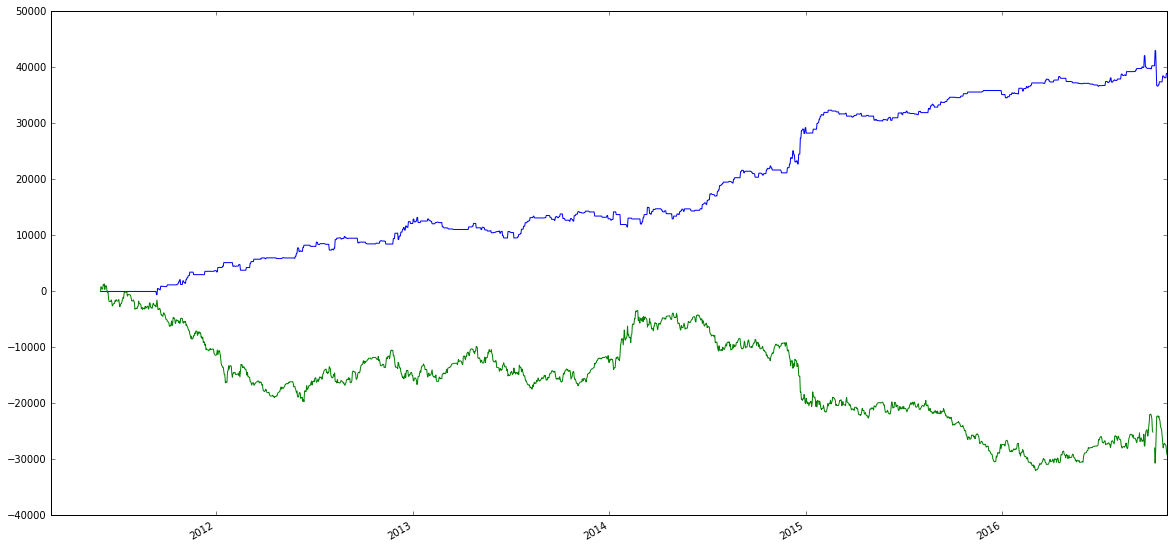

In [483]:
entry = signals_df.long_entry_signal
exit = signals_df.long_exit_signal

#entry = signals_df.short_entry_signal
#exit = signals_df.short_exit_signal

exodf = pd.DataFrame()
exodf['exo'] = px_ser.dropna()

direction = 1
pl, inposition = backtester.backtest(exodf.iloc[:], entry, exit, direction)
equity, stats = backtester.stats(pl, inposition)

equity.plot()
(px_ser*-1).plot()

stats

{'avg': 6.0710351451495663,
 'avgbarsintrade': -0.5605633802816901,
 'avgmae': -10.444369269316256,
 'costs_sum': 0.0,
 'count': 355,
 'maxdd': -8426.3965853792924,
 'netprofit': 2155.2174765280961,
 'std': 525.52249463015141,
 'tradesmaxdd': -8385.3771528080088,
 'winrate': 0.49577464788732395}

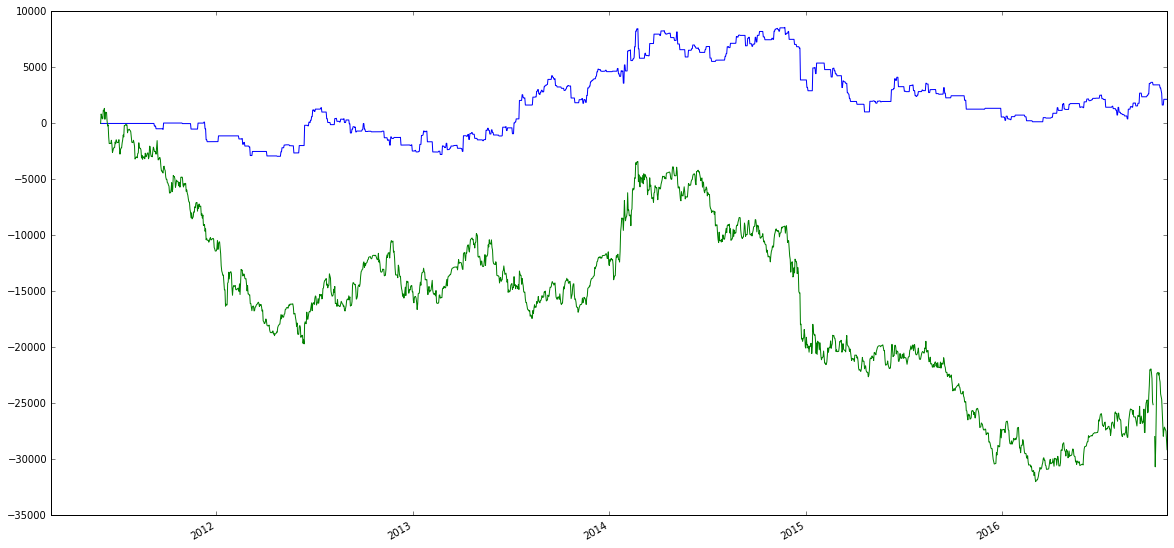

In [484]:
#entry = signals_df.long_entry_signal
#exit = signals_df.long_exit_signal

entry = signals_df.short_entry_signal
exit = signals_df.short_exit_signal

exodf = pd.DataFrame()
exodf['exo'] = px_ser.dropna()

direction = -1
pl, inposition = backtester.backtest(exodf.iloc[:], entry, exit, direction)
equity, stats = backtester.stats(pl, inposition)

equity.plot()

(px_ser*-1).plot()

stats